In [8]:
# Spam detector simple code in python
import re

def simple_spam_detector(message):
    spam_keywords = ['win', 'free', 'prize', 'offer', 'money', 'click', 'buy now', 'lottery', 'gift', 'urgent']
    message = message.lower()

    # Split message into separate words using regex
    words = re.findall(r'\b\w+\b', message)
    score = sum(word in spam_keywords for word in words)


    if score >= 2:
        return "Spam Detected"
    else:
        return "Not Spam"


email1 = "Congratulations! You won a free iPhone. Click here to claim now!"
email2 = "Hello John, please send me the project report."
email3 = "You’ve been selected for a free vacation! Reply YES to win."

print(email1, "->", simple_spam_detector(email1))
print(email2, "->", simple_spam_detector(email2))
print(email3, "->", simple_spam_detector(email3))


Congratulations! You won a free iPhone. Click here to claim now! -> Spam Detected
Hello John, please send me the project report. -> Not Spam
You’ve been selected for a free vacation! Reply YES to win. -> Spam Detected


✅ Dataset Loaded Successfully!

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


/tmp/ipython-input-918515993.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


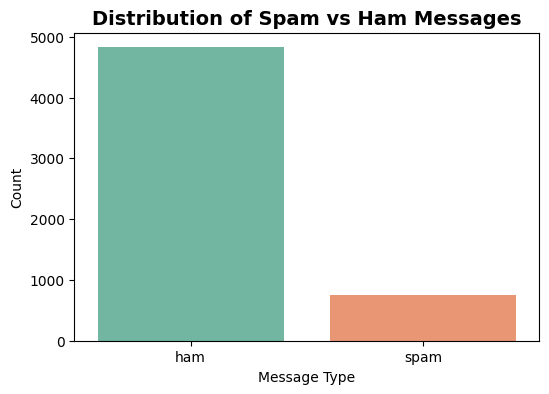


 Model Evaluation Metrics:
Accuracy: 98.39 %

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[959   6]
 [ 12 138]]


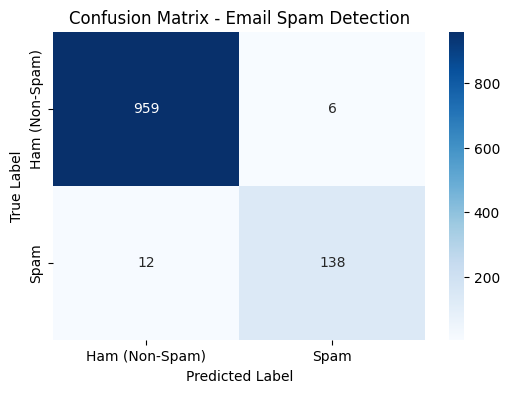


 Test on Custom Messages:

 Message: Congratulations! You won a $1000 gift card. Click now to claim!
 -> Prediction: Spam

 Message: Hello, please find the attached report for today's meeting.
 -> Prediction: Ham (Not Spam)

 Message: You’ve been selected for a free vacation! Reply YES to win.
 -> Prediction: Spam


In [10]:
# Spam detctor by using machine learning

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("spam.csv", encoding='latin-1')

# Clean dataset
df = df.rename(columns={"v1": "label", "v2": "message"})
df = df[['label', 'message']]

print(" Dataset Loaded Successfully!\n")
print(df.head())


df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

#  Visualize Spam vs Ham Count
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title("Distribution of Spam vs Ham Messages", fontsize=14, fontweight='bold')
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()


#  Split Data
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42
)

#  Convert Text Data to Numerical
cv = CountVectorizer(stop_words='english')  # removes common words like "the", "is"
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

#  Train Model
model = MultinomialNB()
model.fit(X_train_cv, y_train)

#  Predict on Test Data
y_pred = model.predict(X_test_cv)

# Evaluate Model
print("\n Model Evaluation Metrics:")
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#  Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Ham (Non-Spam)', 'Spam'],
            yticklabels=['Ham (Non-Spam)', 'Spam'])
plt.title("Confusion Matrix - Email Spam Detection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#  Test on Custom Messages
print("\n Test on Custom Messages:")
sample_messages = [
    "Congratulations! You won a $1000 gift card. Click now to claim!",
    "Hello, please find the attached report for today's meeting.",
    "You’ve been selected for a free vacation! Reply YES to win."
]

sample_cv = cv.transform(sample_messages)
predictions = model.predict(sample_cv)

for msg, pred in zip(sample_messages, predictions):
    label = "Spam" if pred == 1 else "Ham (Not Spam)"
    print(f"\n Message: {msg}\n -> Prediction: {label}")


